Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

Importing Dataset

In [25]:
dataset = pd.read_csv('50_Startups.csv')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [28]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Analysing Data

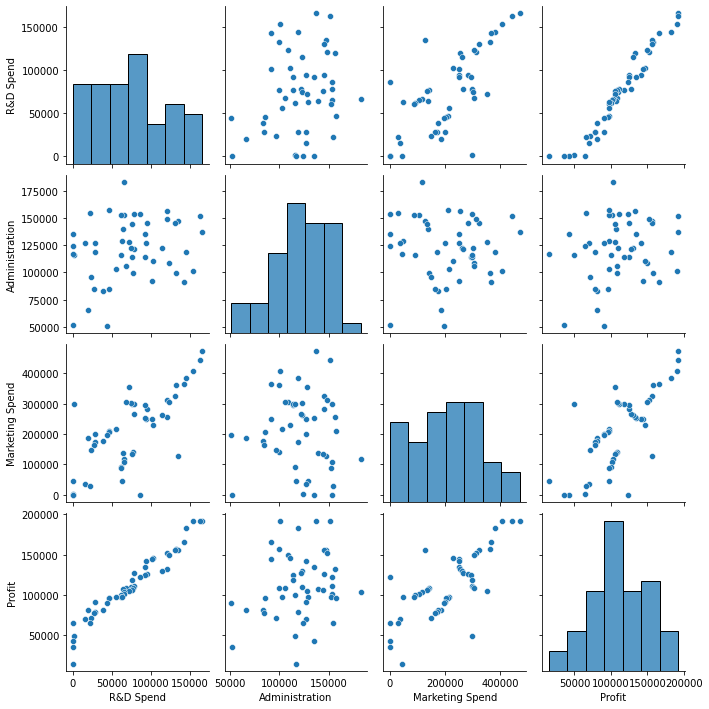

In [17]:
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


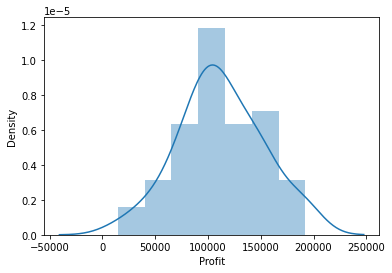

In [20]:
sns.distplot(dataset['Profit'])

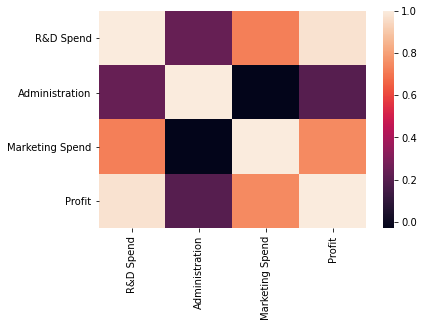

In [21]:
sns.heatmap(dataset.corr())

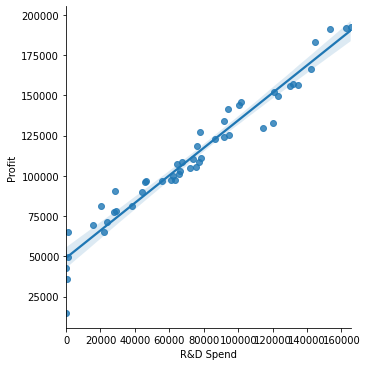

In [22]:
sns.lmplot(x = 'R&D Spend', y = 'Profit', data = dataset)

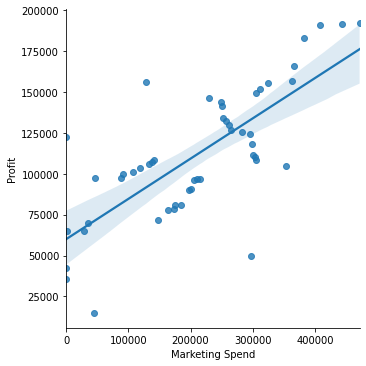

In [23]:
sns.lmplot(x = 'Marketing Spend', y = 'Profit', data = dataset)

In [29]:
cat_feat = ['State']
dataset_1 = pd.get_dummies(dataset, columns= cat_feat, drop_first= True)

In [31]:
dataset_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [32]:
x = dataset_1.drop(['Profit'], axis = 1)
y = dataset_1['Profit']

Splitting dataset into train/test set

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Trainign the dataset on linear regression model

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions

In [35]:
y_pred = regressor.predict(x_test)

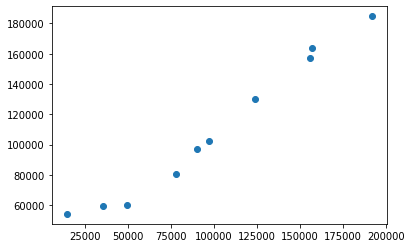

In [36]:
plt.scatter(y_test, y_pred)

Metrics

In [38]:
print(regressor.intercept_)

63605.66584270638


In [39]:
print(regressor.coef_)

[ 7.72902899e-01 -8.75788409e-02  1.95893428e-02 -1.88987376e+02
 -3.52452971e+02]


In [40]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('SMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ',metrics.r2_score(y_test, y_pred))

MAE:  10910.126807446119
MSE:  243913467.97333783
SMSE:  15617.72928352063
R2 score:  0.9186355813275431


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


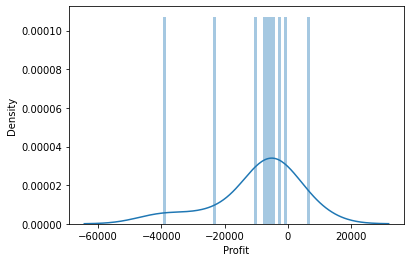

In [41]:
sns.distplot((y_test-y_pred), bins = 50)